<a href="https://colab.research.google.com/github/duanefonseca/CricketML/blob/main/analise_trancamentos_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bloco de código abaixo para importar planilha no formato csv e gerar um dataframe

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/content/trancamentos_2024_1.csv'
#df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Assuming the encoding might be ISO-8859-1 if there are special characters
try:
    df = pd.read_csv(file_path, encoding='utf-8')
    sample_data = df.head()
except Exception as e:
    sample_data = str(e)

sample_data
# Show the first few rows of the DataFrame
df.head()


,Matrícula,Nome do Aluno,Código,Nome da Disciplina,Turma,Estado,Solicitação,Analise,Calouros
0,167594,Adriano Terra da Roza,16208,Fundamentos da Extensão Universitária,U,Atendida,25/03/2024 03:47Adriano Roza,25/03/2024 08:21Duane Fonseca,Aguiar Rodrigues da Silva
1,166601,Alex Sandro Porto Viega,16091,Fisiologia Animal Comparada I,U,Atendida,19/04/2024 14:52Alex Viega,30/04/2024 09:11Duane Fonseca,Amanda Contreira Ferreira
2,166601,Alex Sandro Porto Viega,2285,Química Geral I,L,Atendida,08/04/2024 12:45Alex Viega,08/04/2024 16:27Duane Fonseca,Andressa Farias Pereira
3,166601,Alex Sandro Porto Viega,16077,Biofísica das Radiações,B,Atendida,19/04/2024 14:52Alex Viega,30/04/2024 09:11Duane Fonseca,Andriele Dias Barbosa Ferreira
4,155607,Aline Cristina Lima de Lima,16086,Histologia II,B,Atendida,31/03/2024 16:33Aline Lima,31/03/2024 18:15Duane Fonseca,Anna Lara Lemos Moraes


Bloco de código abaixo mostra a lista de todos os trancamentos e resumo no final

In [ ]:
# Grouping the DataFrame by student name and aggregate the courses into a list
students_courses = df.groupby('Nome do Aluno')['Nome da Disciplina'].apply(list)

# Printing each student's name and their list of courses
for student, courses in students_courses.items():
    print(f"{student}")
    #print("Lista das disciplinas:")
    for course in courses:
        print(f"- {course}")
    print("")  # Print a blank line between students

### MODIFICATION START ###
# Totalizing the number of unique "disciplinas"
unique_disciplinas = df['Nome da Disciplina'].nunique()
print(f"Número de disciplinas trancadas: {unique_disciplinas}")
### MODIFICATION END ###

# Totalizing the number of "disciplinas"
total_disciplinas = df['Nome da Disciplina'].count()
print(f"Número de trancamentos: {total_disciplinas}")

# Totalizing the number of students
total_students = df['Nome do Aluno'].nunique()
print(f"Número total de estudantes: {total_students}")


Adriano Terra da Roza
- Fundamentos da Extensão Universitária

Alex Sandro Porto Viega
- Fisiologia Animal Comparada I
- Química Geral I
- Biofísica das Radiações

Aline Cristina Lima de Lima
- Histologia II

Amora Felkl de Almeida
- Morfologia e Anatomia Vegetal

Ana Julia da Silva Santos
- Morfologia e Anatomia Vegetal
- Química Geral I
- Programa de Extensão Interdisciplinar em Ciências e Biologia I

Andressa Farias Pereira
- Psicologia da Educação
- Química Geral I
- Biologia e Diversidade de Fungos
- BIOLOGIA CELULAR
- Fundamentos da Extensão Universitária
- LIBRAS I
- Didática
- Diversidade Animal I

Anna Lara Lemos Moraes
- Química Geral I
- Didática
- Fundamentos da Extensão Universitária
- Biologia e Diversidade de Fungos
- BIOLOGIA CELULAR
- Psicologia da Educação
- LIBRAS I
- Diversidade Animal I

Beatriz Correa Giesta
- Sociedade, Educação e Relações Étnico-Raciais
- Morfologia e Anatomia Vegetal

Brunyelli Machado Rolim
- Química Geral I
- Didática
- LIBRAS I
- Psicologia 

Execute o código abaixo para poder continuar a análise. Não haverá output nessa execução

In [ ]:
#student_discipline_counts = df.groupby('Matrícula')['Nome da Disciplina'].count()

Bloco de código abaixo mostra o número de alunos com número >= 3 trancamentos

In [ ]:
student_discipline_counts = df.groupby('Matrícula')['Nome da Disciplina'].count()
# Filter students with 3 or more disciplines
students_with_3_or_more = df[df['Matrícula'].isin(student_discipline_counts[student_discipline_counts >= 3].index)].copy()

# Add the count of disciplines to the students' names
students_with_3_or_more['Aluno'] = students_with_3_or_more['Nome do Aluno']
students_with_3_or_more['Número de trancamentos'] = students_with_3_or_more.apply(
    lambda x: student_discipline_counts[x['Matrícula']], axis=1)

# Extract relevant columns
formatted_table = students_with_3_or_more[['Aluno', 'Número de trancamentos']].drop_duplicates()

# Print the table in the console
print("Aluno com >= 3 trancamentos" + " " * (25 - len("Aluno")) + "Número de trancamentos")
print("-" * 80)
for index, row in formatted_table.iterrows():
    print(row['Aluno'] + " " * (50 - len(row['Aluno'])) + str(row['Número de trancamentos']))



Aluno com >= 3 trancamentos                    Número de trancamentos
--------------------------------------------------------------------------------
Alex Sandro Porto Viega                           3
Ana Julia da Silva Santos                         3
Andressa Farias Pereira                           8
Anna Lara Lemos Moraes                            8
Brunyelli Machado Rolim                           8
Camila de Avila Costa                             3
Elter da Silva Correa                             8
Erico Antonini Schroeder                          4
Gabriel Lima Pinheiro                             4
Gabriel Pereira Costa                             4
Gabriela Kuhn                                     3
Hemely Larissa de Albernaz Paranhos               9
Kailane Severo Pimentel                           8
Laura Silva Larrossa                              3
Manuela Castro da Silveira                        8
Marina Kruger Pereira                             5
Natália Popiorek 

Códido que filtra o número de trancamentos feitos pelos CALOUROS. Atenção ao nome da coluna no seu arquivo csv. Deve ser 'Calouros', sem modificação

In [ ]:
# Load the CSV file into a DataFrame
#file_path = '/content/trancamentos_2024_1.csv'
#try:
#    df = pd.read_csv(file_path, encoding='utf-8')
#except:
#    df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Filter the DataFrame to include only students that appear in both columns
common_students = set(df['Nome do Aluno']).intersection(set(df['Calouros']))

filtered_df = df[df['Nome do Aluno'].isin(common_students)]

# Group by student name and aggregate the number of courses
students_courses_count = filtered_df.groupby('Nome do Aluno')['Nome da Disciplina'].count()

# Convert students_courses_count to a DataFrame and print
students_courses_df = students_courses_count.reset_index()
students_courses_df.columns = ['Nome do Aluno', 'Número de Disciplinas']
print(students_courses_df)

# Printing each student's name and their number of courses
#for student, count in students_courses_count.items():
#    print(f"{student}: {count} disciplinas")
print()
# Printing the total count of "disciplinas"
total_count = students_courses_count.sum()
print(f"NUMERO DE TRANCAMENTOS PELOS CALOUROS: {total_count}")

# Printing the total count of students
total_students = filtered_df['Nome do Aluno'].nunique()
print(f"NUMERO TOTAL DE ESTUDANTES: {total_students}")

                       Nome do Aluno  Número de Disciplinas
0            Andressa Farias Pereira                      8
1             Anna Lara Lemos Moraes                      8
2            Brunyelli Machado Rolim                      8
3              Gabriel Pereira Costa                      4
4            Kailane Severo Pimentel                      8
5         Manuela Castro da Silveira                      8
6              Marina Kruger Pereira                      5
7             Nathalya Lessa Cardoso                      8
8   Paula Roberta de Lemos Rodrigues                      2
9        Sindaya Juraci Braga Acosta                      1
10  Tiago Pinheiro Bandeira de Souza                      1

NUMERO DE TRANCAMENTOS PELOS CALOUROS: 61
NUMERO TOTAL DE ESTUDANTES: 11


Código para mostrar os calouros que trancaram número >= 3 de disciplinas

In [ ]:


# Filter the DataFrame to include only students that appear in both columns
common_students = set(df['Nome do Aluno']).intersection(set(df['Calouros']))
filtered_df = df[df['Nome do Aluno'].isin(common_students)]

# Group by student name and aggregate the number of courses
students_courses_count = filtered_df.groupby('Nome do Aluno')['Nome da Disciplina'].count()

# Convert students_courses_count to a DataFrame
students_courses_df = students_courses_count.reset_index()
students_courses_df.columns = ['Nome do Aluno', 'Número de trancamentos']

# Identify students with 3 or more course enrollments
students_with_3_or_more = students_courses_df[students_courses_df['Número de trancamentos'] >= 3]

# Convert students_with_3_or_more to a DataFrame (it's already a DataFrame, so this step is redundant)
students_with_3_or_more_df = pd.DataFrame(students_with_3_or_more)

print(students_with_3_or_more_df)





                Nome do Aluno  Número de trancamentos
0     Andressa Farias Pereira                       8
1      Anna Lara Lemos Moraes                       8
2     Brunyelli Machado Rolim                       8
3       Gabriel Pereira Costa                       4
4     Kailane Severo Pimentel                       8
5  Manuela Castro da Silveira                       8
6       Marina Kruger Pereira                       5
7      Nathalya Lessa Cardoso                       8


Gráfico do número de trancamentos por disciplina. Inset é distribuição de frequências de trancamento por aluno

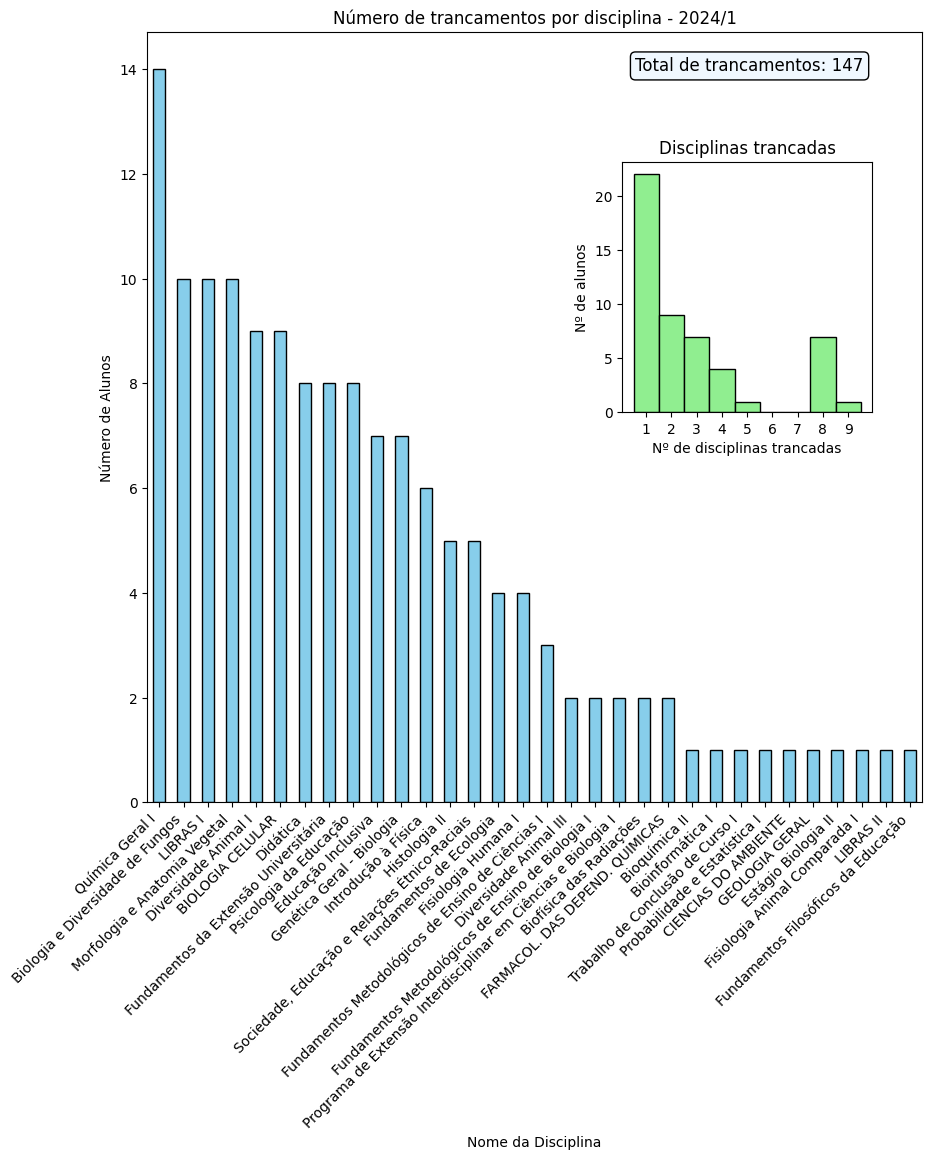

<Figure size 1000x1000 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Count the number of students in each course
course_counts = df['Nome da Disciplina'].value_counts()

# Create a bar plot - ALTERAR O TITULO DO GRAFICO
plt.figure(figsize=(10, 10))
course_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Número de trancamentos por disciplina - 2024/1')
#plt.xlabel('Nome da Disciplina')
plt.ylabel('Número de Alunos')
plt.xticks(rotation=45, ha='right')

# Calculate the total sum of students across all courses
total_students = course_counts.sum()

# Add an annotation for the total sum
plt.annotate(f'Total de trancamentos: {total_students}',
             xy=(0.63, 0.95), xycoords='axes fraction',
             fontsize=12, color='black',
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="aliceblue"))

# Count the number of disciplines each student is enrolled in
student_discipline_counts = df['Matrícula'].value_counts()

# Add an inset plot of the histogram for the frequency of disciplines by students
ax_inset = plt.axes([0.6, 0.5, 0.25, 0.25])  # [left, bottom, width, height]
ax_inset.hist(student_discipline_counts, bins=range(1, student_discipline_counts.max() + 2),
              color='lightgreen', edgecolor='black', align='mid')
ax_inset.set_title('Disciplinas trancadas')
ax_inset.set_xlabel('Nº de disciplinas trancadas')
ax_inset.set_ylabel('Nº de alunos')

# Calculate midpoints of the bins
midpoints = [(x + x + 1) / 2 for x in range(1, student_discipline_counts.max() + 1)]

# Set the x-ticks to be the midpoints of the bins
ax_inset.set_xticks(midpoints)

# Label the x-ticks with the number of disciplines
ax_inset.set_xticklabels(range(1, student_discipline_counts.max() + 1))

# Show the plot
#plt.tight_layout()
plt.figure(figsize=(10, 10), constrained_layout=True)

plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Data preparation
course_counts = df['Nome da Disciplina'].value_counts()
student_discipline_counts = df['Matrícula'].value_counts()

# Option to display legend
show_legend = False  # Set to False to hide the legend

# Plot creation
fig = go.Figure()

# Main bar plot
fig.add_trace(go.Bar(
    x=course_counts.index,
    y=course_counts,
    marker_color='skyblue',
    name='Número de Alunos'
))

# Inset histogram
fig.add_trace(go.Histogram(
    x=student_discipline_counts,
    marker_color='lightgreen',
    xbins=dict(start=0.5, end=student_discipline_counts.max() + 0.5, size=1),
    name='Disciplinas trancadas',
    xaxis='x2',
    yaxis='y2'
))

# Layout update
fig.update_layout(
    title='Número de trancamentos por disciplina - 2024/1',
    yaxis_title='Número de Alunos',
    xaxis_tickfont_size=12,
    xaxis=dict(showticklabels=False),
    height=800,
    xaxis2=dict(domain=[0.65, 0.95], anchor='y2', title='Nº de disciplinas trancadas'),
    yaxis2=dict(domain=[0.65, 0.95], anchor='x2', title='Nº de alunos'),
    annotations=[dict(x=0.92, y=0.98, text=f'Total de trancamentos: {course_counts.sum()}',
                      showarrow=False, bgcolor='aliceblue', bordercolor='black',
                      xref="paper", yref="paper")],
    showlegend=show_legend  # Controls the visibility of the legend
)

# Display the figure
fig.show()

# Save the figure as an HTML file
file_name = "plot.html"
fig.write_html(file_name)
print(f"Plot saved as {file_name}")


Plot saved as plot.html
